In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('gisette_train.data',sep=" ")
df.head()

,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409,Unnamed: 5000
0,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,NaN
3,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,983,0,0,0,0,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Columns: 5001 entries, 550 to Unnamed: 5000
dtypes: float64(1), int64(5000)
memory usage: 228.9 MB


In [5]:
df.drop('Unnamed: 5000',axis=1,inplace=True)

In [6]:
df.head()

,550,0,495,0.1,0.2,0.3,0.4,976,0.5,0.6,...,0.3855,0.3856,0.3857,991.153,991.154,0.3858,0.3859,0.3860,0.3861,983.409
0,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
3,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,983,0,0,0,0,0,0


In [7]:
df.isnull().sum().sum()

0

In [8]:
df1=pd.read_csv('gisette_train.labels')

In [9]:
df1.head()

,1
0,-1
1,1
2,1
3,1
4,1


In [10]:
x_train=df.values

In [11]:
y_train=df1.values

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
x_sc=sc.fit_transform(x_train)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=100)

In [17]:
x_pca=pca.fit_transform(x_sc)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lgr=LogisticRegression()

In [20]:
lgr.fit(x_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred=lgr.predict(x_pca)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train,y_pred)

0.9776629438239707

In [24]:
x_test=pd.read_csv('gisette_valid.data',sep=" ")

In [25]:
x_test.head()

,688,0,0.1,0.2,0.3,0.4,0.5,952,0.6,870,...,0.4436,0.4437,0.4438,0.4439,0.4440,494,0.4441,769.1,0.4442,Unnamed: 5000
0,778,758,0,0,0,0,0,708,0,991,...,0,0,770,0,0,0,0,0,0,NaN
1,469,0,816,0,0,0,0,0,0,0,...,0,0,467,0,0,0,417,0,0,NaN
2,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,976,0,NaN
4,0,0,0,0,0,0,0,0,0,450,...,0,0,0,0,0,800,0,0,0,NaN


In [26]:
x_test.drop('Unnamed: 5000',axis=1,inplace=True)

In [27]:
x_test.head()

,688,0,0.1,0.2,0.3,0.4,0.5,952,0.6,870,...,0.4435,0.4436,0.4437,0.4438,0.4439,0.4440,494,0.4441,769.1,0.4442
0,778,758,0,0,0,0,0,708,0,991,...,0,0,0,770,0,0,0,0,0,0
1,469,0,816,0,0,0,0,0,0,0,...,0,0,0,467,0,0,0,417,0,0
2,0,0,0,0,0,571,991,983,0,983,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,949,0,991,...,0,0,0,0,0,0,0,0,976,0
4,0,0,0,0,0,0,0,0,0,450,...,991,0,0,0,0,0,800,0,0,0


In [28]:
x_test1=x_test.values

In [29]:
y_test=pd.read_csv('gisette_valid.labels')
y_test.head()

,1
0,1
1,-1
2,1
3,1
4,-1


In [30]:
y_test1=y_test.values

In [31]:
x_test.shape

(999, 5000)

In [32]:
x1_sc=sc.transform(x_test1)

In [33]:
x_pca1=pca.transform(x1_sc)

In [34]:
# from sklearn.linear_model import LogisticRegression

In [35]:
# lgr=LogisticRegression()

In [36]:
y_pred2=lgr.predict(x_pca1)

In [37]:
accuracy_score(y_pred2,y_test1)

0.9769769769769769

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier()

In [40]:
from sklearn.cluster import KMeans
cluster_id=[]
k=list(range(1,5))
for i in range(1,5):
    km=KMeans(i).fit(x_pca)
    y_km_iris_pred=km.fit_predict(x_pca)
    cluster_id.append(km.inertia_)    
cluster_id    

[9479809.606208084, 8942648.569051843, 8609677.128256546, 8341227.231097612]

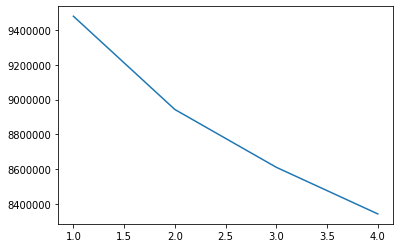

In [41]:
plt.plot(k,cluster_id)